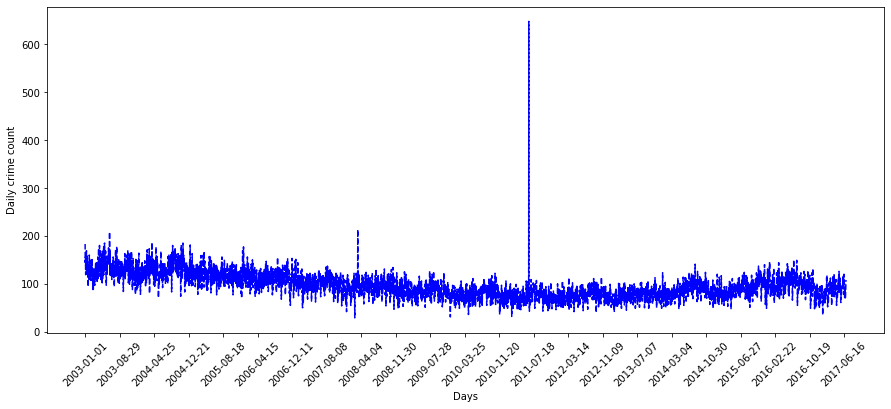

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# and even more change blah blah ok https://medium.com/@hhl60492/black-swans-and-hockey-riots-extreme-value-analysis-and-generalized-extreme-value-distributions-d4b4b84cd374
# ExtremV1.R /Users/myfolder/Desktop/coding/R

# https://github.com/hhl60492/blog/blob/master/crime.csv
# https://raw.githubusercontent.com/hhl60492/blog/master/crime.csv    
# https://raw.githubusercontent.com/hhl60492/blog/master/crimes_daily.csv   
# https://github.com/hhl60492/blog/blob/master/crimes_daily.csv
    
### Data Wrangling code adapted from https://www.kaggle.com/wosaku/eda-of-crime-in-vancouver-2003-2017

# import csv
# df = pd.read_csv('crime.csv')
df = pd.read_csv('https://raw.githubusercontent.com/hhl60492/blog/master/crime.csv')

df.head()

# Dropping column. Use axis = 1 to indicate columns and inplace = True to 'commit' the transaction
df.drop(['MINUTE'], axis = 1, inplace=True)

# As HOUR is a float data type, I'm filling with a dummy value of '99'. For others, filling with 'N/A'
df['HOUR'].fillna(99, inplace = True)
df['NEIGHBOURHOOD'].fillna('N/A', inplace = True)
df['HUNDRED_BLOCK'].fillna('N/A', inplace = True)

# Use pandas function to_datetime to convert it to a datetime data type
df['DATE'] = pd.to_datetime({'year':df['YEAR'], 'month':df['MONTH'], 'day':df['DAY']})

# Let's use padas dt.dayofweek (Monday=0 to Sunday=6) and add it as a column called 'DAY_OF_WEEK'
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

# Change the index to the colum 'DATE'
df.index = pd.DatetimeIndex(df['DATE'])

# Filtering the data to exclude month of July 2017
df = df[df['DATE'] < '2017-07-01']

# Using pandas value_counts function to aggregate types
df['TYPE'].value_counts().sort_index()

# Create a function to categorize types, using an 'if' statement.
def category(crime_type):
    if 'Theft' in crime_type:
        return 'Theft'
    elif 'Break' in crime_type:
        return 'Break and Enter'
    elif 'Collision' in crime_type:
        return 'Vehicle Collision'
    else:
        return 'Others'

# Apply the function and add it as CATEGORY column
df['CATEGORY'] = df['TYPE'].apply(category)
vehicle_collision = df[df['CATEGORY'] == 'Vehicle Collision']
crimes = df[df['CATEGORY'] != 'Vehicle Collision']

# resample daily crime counts, keep the outlier event
crimes_daily = pd.DataFrame(crimes.resample('D').size())
crimes_daily = crimes_daily.rename(columns={0:'daily reported crimes'})
crimes_daily_vals = np.squeeze(crimes_daily.values)

from datetime import datetime

plt.figure(figsize=(15,6))
date_step = 240
plt.plot(np.arange(len(crimes_daily_vals)),crimes_daily_vals,'b--')
plt.xlabel('Days')
plt.ylabel('Daily crime count')
plt.xticks(np.arange(len(crimes_daily_vals), step = date_step), [x[:10] for x in crimes_daily.index.astype(str)[0::date_step]], rotation=45)
plt.show()

# crimes_daily.to_csv('crimes_daily.csv')
# crimes_daily.to_csv('https://raw.githubusercontent.com/hhl60492/blog/master/crimes_daily.csv')

# view rawwrangle_data1.py hosted with ❤ by GitHub